In [26]:
import numpy as np
import pandas as pd
import adaboost
import utils
import matplotlib.pyplot as plt
import random_forest_adaboost
from sklearn.model_selection import train_test_split
from sklearn.cross_validation import KFold
from sklearn.preprocessing import scale
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

In [27]:
data = pd.read_csv("data/spambase.data.shuffled", header=None)
Y_index = 57
data["Y"] = np.where(data[Y_index] == 0, -1, 1)
data = data.drop(Y_index, 1)
data[data.drop("Y", 1).columns.values] = scale(data[data.drop("Y", 1).columns.values])
X_train, X_test, y_train, y_test = train_test_split(data.drop("Y", 1), data["Y"], test_size=0.33)

In [54]:
# Adaboost Regularized v1 (ours)
reload(random_forest_adaboost)
reload(adaboost)

rfa = random_forest_adaboost.RandomForestAdaboost(1000, 1, weighted=False, random=True)
weights = rfa.fit(X_train, y_train)
print "Error testing : {0}".format(1-rfa.score(X_test, y_test, T))

Error testing : 0.174456879526


(array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]),
 array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ]),
 <a list of 10 Patch objects>)

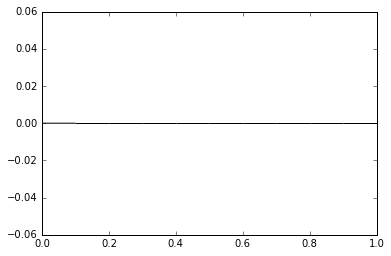

In [52]:
plt.hist(weights * 100)